In [114]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


In [115]:
df = pd.read_csv('games 2.csv')
df.head(1)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5


In [116]:
#best opening where the underdog wins
df['winner_encoded'] = df['winner'].map({'white': 1, 'draw': 0, 'black': -1})
df= df[df['white_rating'] + 50 <= df['black_rating']]



In [117]:
print(df.describe())
for i in df:
    print(df[i].value_counts())
df.columns

         created_at  last_move_at        turns  white_rating  black_rating  \
count  7.075000e+03  7.075000e+03  7075.000000   7075.000000   7075.000000   
mean   1.482852e+12  1.482853e+12    59.939647   1481.338375   1707.146714   
std    2.849477e+10  2.849475e+10    33.359331    277.828494    289.254984   
min    1.376772e+12  1.376772e+12     1.000000    784.000000    930.000000   
25%    1.475927e+12  1.475928e+12    37.000000   1281.000000   1500.000000   
50%    1.494890e+12  1.494890e+12    55.000000   1477.000000   1686.000000   
75%    1.502934e+12  1.502935e+12    78.000000   1672.500000   1899.500000   
max    1.504492e+12  1.504493e+12   226.000000   2355.000000   2723.000000   

       opening_ply  winner_encoded  
count  7075.000000     7075.000000  
mean      4.754346       -0.345583  
std       2.869932        0.913262  
min       1.000000       -1.000000  
25%       3.000000       -1.000000  
50%       4.000000       -1.000000  
75%       6.000000        1.000000  
m

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply',
       'winner_encoded'],
      dtype='object')

In [118]:
df =df.drop(columns = ['id', 'white_id', 'black_id', 'opening_eco', 'moves'])

#dropping time
df['duration'] = df['last_move_at'] - df['created_at']
df['duration'].describe()
df['duration'].value_counts()
df = df.drop(columns = ['duration', 'last_move_at', 'created_at'])


In [119]:
df['opening_name'] = df['opening_name'].str.split(':').str[0]
df['opening_name'].value_counts()

opening_name
Sicilian Defense                                           1070
French Defense                                              446
Queen's Pawn Game                                           374
King's Pawn Game                                            350
Italian Game                                                310
                                                           ... 
King's Gambit Accepted |  King's Knight Gambit                1
Alekhine Defense #3                                           1
Englund Gambit Declined |  Reversed Alekhine                  1
Semi-Bononi                                                   1
King's Gambit |  Falkbeer Countergambit |  Miles Gambit       1
Name: count, Length: 190, dtype: int64

In [120]:
#get dummys and add replace increment code with time and delay

# df = df.drop(columns = ['victory_status', 'winner', 'opening_name'])
df['time'], df['delay'] = df['increment_code'].str.split('+').str[0], df['increment_code'].str.split('+').str[1]
df = df.drop(columns = ['increment_code'])
df.time = df.time.astype(int)
df.delay = df.delay.astype(int)
df_dummy = pd.get_dummies(df,drop_first=True)


In [121]:
df_dummy

,rated,turns,white_rating,black_rating,opening_ply,winner_encoded,time,delay,victory_status_mate,victory_status_outoftime,...,opening_name_Trompowsky Attack,opening_name_Valencia Opening,opening_name_Van Geet Opening,opening_name_Van't Kruijs Opening,opening_name_Vienna Game,opening_name_Vienna Game #2,opening_name_Ware Defense,opening_name_Ware Opening,opening_name_Yusupov-Rubinstein System,opening_name_Zukertort Opening
7,False,9,1413,2108,5,-1,15,30,False,False,...,False,False,False,False,False,False,False,False,False,False
11,False,38,1381,1867,9,-1,20,60,False,False,...,False,False,False,False,False,False,False,False,False,False
12,False,60,1381,1936,3,-1,5,40,False,False,...,False,False,False,False,False,False,False,False,False,False
13,False,31,1381,1607,2,-1,8,0,False,False,...,False,False,False,False,False,False,False,False,False,False
18,False,101,1094,1300,5,-1,15,15,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20038,True,36,1247,1359,4,-1,15,15,False,False,...,False,False,False,False,False,False,False,False,False,False
20040,True,87,1261,1461,6,-1,10,10,False,False,...,False,False,False,False,False,False,False,False,False,False
20041,True,58,1263,1770,3,-1,10,10,True,False,...,False,False,False,False,False,False,False,False,False,False
20055,True,35,1219,1286,3,1,10,0,True,False,...,False,False,False,False,False,False,False,False,False,False


In [122]:
from sklearn.model_selection import train_test_split
df_dummy = df_dummy.drop(columns=['turns', 'winner_white', 'winner_draw'])

a = list(df_dummy.columns)
print(a)
a.remove('winner_encoded')

xtrain, xtest, ytrain, ytest = train_test_split(df_dummy[a], df_dummy['winner_encoded'], test_size = .2, random_state=30)
ytest.shape




['rated', 'white_rating', 'black_rating', 'opening_ply', 'winner_encoded', 'time', 'delay', 'victory_status_mate', 'victory_status_outoftime', 'victory_status_resign', 'opening_name_Alekhine Defense #3', 'opening_name_Amar Opening', 'opening_name_Amazon Attack', 'opening_name_Anderssen Opening', 'opening_name_Barnes Defense', 'opening_name_Barnes Opening', 'opening_name_Benko Gambit', 'opening_name_Benko Gambit Accepted |  Fianchetto Variation', 'opening_name_Benko Gambit Accepted |  Fully Accepted Variation', 'opening_name_Benko Gambit Accepted |  Yugoslav |  without 7...Bxf1', 'opening_name_Benoni Defense', 'opening_name_Bird Opening', "opening_name_Bishop's Opening", 'opening_name_Blackmar-Diemer Gambit', 'opening_name_Blackmar-Diemer Gambit #2', 'opening_name_Blackmar-Diemer Gambit Declined |  Brombacher Countergambit', 'opening_name_Blumenfeld Countergambit #2', 'opening_name_Blumenfeld Countergambit Accepted', 'opening_name_Bogo-Indian Defense', 'opening_name_Borg Defense', 'open

(1415,)

In [123]:

df_dummy

,rated,white_rating,black_rating,opening_ply,winner_encoded,time,delay,victory_status_mate,victory_status_outoftime,victory_status_resign,...,opening_name_Trompowsky Attack,opening_name_Valencia Opening,opening_name_Van Geet Opening,opening_name_Van't Kruijs Opening,opening_name_Vienna Game,opening_name_Vienna Game #2,opening_name_Ware Defense,opening_name_Ware Opening,opening_name_Yusupov-Rubinstein System,opening_name_Zukertort Opening
7,False,1413,2108,5,-1,15,30,False,False,True,...,False,False,False,False,False,False,False,False,False,False
11,False,1381,1867,9,-1,20,60,False,False,True,...,False,False,False,False,False,False,False,False,False,False
12,False,1381,1936,3,-1,5,40,False,False,True,...,False,False,False,False,False,False,False,False,False,False
13,False,1381,1607,2,-1,8,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
18,False,1094,1300,5,-1,15,15,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20038,True,1247,1359,4,-1,15,15,False,False,True,...,False,False,False,False,False,False,False,False,False,False
20040,True,1261,1461,6,-1,10,10,False,False,True,...,False,False,False,False,False,False,False,False,False,False
20041,True,1263,1770,3,-1,10,10,True,False,False,...,False,False,False,False,False,False,False,False,False,False
20055,True,1219,1286,3,1,10,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: ylabel='winner_encoded'>

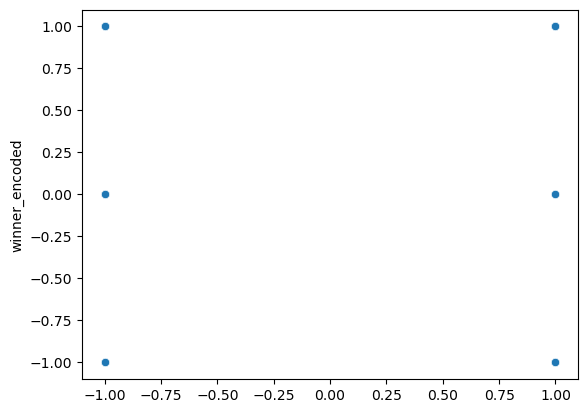

In [124]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)
train_preds = model.predict(xtrain)
test_preds = model.predict(xtest)

sns.scatterplot(x = prediction, y = ytest)


In [125]:
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(ytrain, train_preds))
print("Test Accuracy:", accuracy_score(ytest, test_preds))

Train Accuracy: 0.6498233215547703
Test Accuracy: 0.6473498233215548


In [126]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=130)
model.fit(xtrain, ytrain)
train_preds = model.predict(xtrain)
test_preds = model.predict(xtest)
print("Train Accuracy:", accuracy_score(ytrain, train_preds))
print("Test Accuracy:", accuracy_score(ytest, test_preds))

Train Accuracy: 0.653356890459364
Test Accuracy: 0.6501766784452296


In [127]:
print(df_dummy.columns)
df_dummy

Index(['rated', 'white_rating', 'black_rating', 'opening_ply',
       'winner_encoded', 'time', 'delay', 'victory_status_mate',
       'victory_status_outoftime', 'victory_status_resign',
       ...
       'opening_name_Trompowsky Attack', 'opening_name_Valencia Opening',
       'opening_name_Van Geet Opening', 'opening_name_Van't Kruijs Opening',
       'opening_name_Vienna Game', 'opening_name_Vienna Game #2',
       'opening_name_Ware Defense', 'opening_name_Ware Opening',
       'opening_name_Yusupov-Rubinstein System',
       'opening_name_Zukertort Opening'],
      dtype='object', length=199)


,rated,white_rating,black_rating,opening_ply,winner_encoded,time,delay,victory_status_mate,victory_status_outoftime,victory_status_resign,...,opening_name_Trompowsky Attack,opening_name_Valencia Opening,opening_name_Van Geet Opening,opening_name_Van't Kruijs Opening,opening_name_Vienna Game,opening_name_Vienna Game #2,opening_name_Ware Defense,opening_name_Ware Opening,opening_name_Yusupov-Rubinstein System,opening_name_Zukertort Opening
7,False,1413,2108,5,-1,15,30,False,False,True,...,False,False,False,False,False,False,False,False,False,False
11,False,1381,1867,9,-1,20,60,False,False,True,...,False,False,False,False,False,False,False,False,False,False
12,False,1381,1936,3,-1,5,40,False,False,True,...,False,False,False,False,False,False,False,False,False,False
13,False,1381,1607,2,-1,8,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
18,False,1094,1300,5,-1,15,15,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20038,True,1247,1359,4,-1,15,15,False,False,True,...,False,False,False,False,False,False,False,False,False,False
20040,True,1261,1461,6,-1,10,10,False,False,True,...,False,False,False,False,False,False,False,False,False,False
20041,True,1263,1770,3,-1,10,10,True,False,False,...,False,False,False,False,False,False,False,False,False,False
20055,True,1219,1286,3,1,10,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [138]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
model.fit(xtrain, ytrain)
train_preds = model.predict(xtrain)
test_preds = model.predict(xtest)

from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(ytrain, train_preds))
print("Test Accuracy:", accuracy_score(ytest, test_preds))

Train Accuracy: 0.696113074204947
Test Accuracy: 0.6756183745583039


In [129]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, df_dummy[a], df_dummy['winner_encoded'], cv=5)
print("Cross-val accuracy:", scores.mean())

Cross-val accuracy: 0.6898939929328621


In [130]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(xtrain, ytrain)
prediction = model.predict(xtest)
accuracy = accuracy_score(ytest, prediction)
accuracy

0.6452296819787986

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# Step 2: Define your model
model = DecisionTreeClassifier()

# Step 3: Define the parameter grid
param_grid = {
   'max_depth':[4,5,6],
   'min_samples_split':[5,10],
   'random_state':[42]
}

# Step 4: Set up the grid search
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,             # 5-fold cross-validation
                           scoring='accuracy',
                           verbose=1)

# Step 5: Fit the grid search to the data
grid_search.fit(xtrain, ytrain)

# Step 6: Get the best model and parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score (training):", grid_search.best_score_)
print("Test Set Score:", grid_search.score(xtest, ytest))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'max_depth': 4, 'min_samples_split': 5, 'random_state': 42}
Best Score (training): 0.6729681978798586
Test Set Score: 0.6840989399293286
